# Temperature Forecast Project using ML

In [1]:
# Importing all the required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
temp_proj = pd.read_csv('temperature.csv')

In [4]:
temp_proj

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [5]:
temp_proj.shape

(7752, 25)

Total number of Rows = 7752 and Columns = 25

In [6]:
temp_proj.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [7]:
temp_proj.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

From the above case, there are multiple null values that has to be preprocessed/removed

In [8]:
temp_proj.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [9]:
temp_proj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


From the above case, except date everything is in float data type

In [10]:
temp_proj = temp_proj.dropna(axis=0).reset_index()

From the above case, we dropped all the NaN values

In [11]:
temp_proj.isnull().sum()

index               0
station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

From the above case, it is clear that there are no null values present in the given dataset

In [12]:
temp_proj.describe()

,index,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.000000,7588.000000,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,3859.164207,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,...,0.480738,0.275007,0.265373,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820
std,2232.869924,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,...,1.743327,1.146087,1.179661,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256
min,0.000000,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,1936.750000,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,...,0.000000,0.000000,0.000000,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000
50%,3843.500000,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,...,0.000000,0.000000,0.000000,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000
75%,5781.250000,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,...,0.017735,0.007855,0.000017,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000
max,7749.000000,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000


# Visualization ---

In [13]:
temp_proj = temp_proj.drop(['Date', 'index'], axis = 1)

From the above case, we removed the date as well as index

In [14]:
temp_proj.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

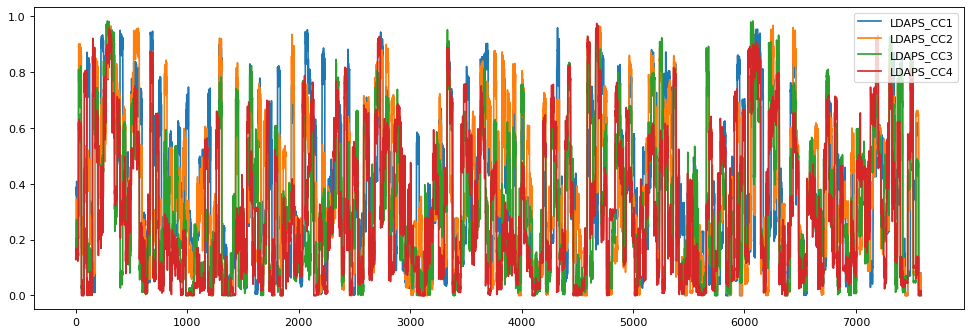

In [18]:
plt.figure(figsize=(15, 5), dpi=80)
plt.plot(temp_proj["LDAPS_CC1"],label="LDAPS_CC1")
plt.plot(temp_proj["LDAPS_CC2"],label="LDAPS_CC2")
plt.plot(temp_proj["LDAPS_CC3"],label="LDAPS_CC3")
plt.plot(temp_proj["LDAPS_CC4"],label="LDAPS_CC4")
plt.legend()
plt.show()

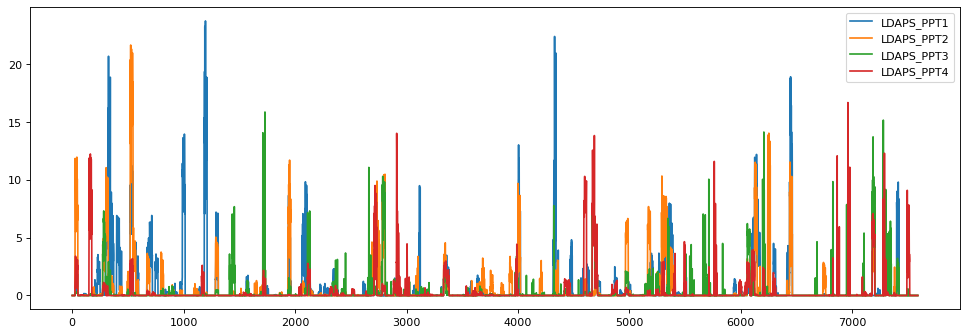

In [19]:
plt.figure(figsize=(15, 5), dpi=80)
plt.plot(temp_proj["LDAPS_PPT1"],label="LDAPS_PPT1")
plt.plot(temp_proj["LDAPS_PPT2"],label="LDAPS_PPT2")
plt.plot(temp_proj["LDAPS_PPT3"],label="LDAPS_PPT3")
plt.plot(temp_proj["LDAPS_PPT4"],label="LDAPS_PPT4")
plt.legend()
plt.show()

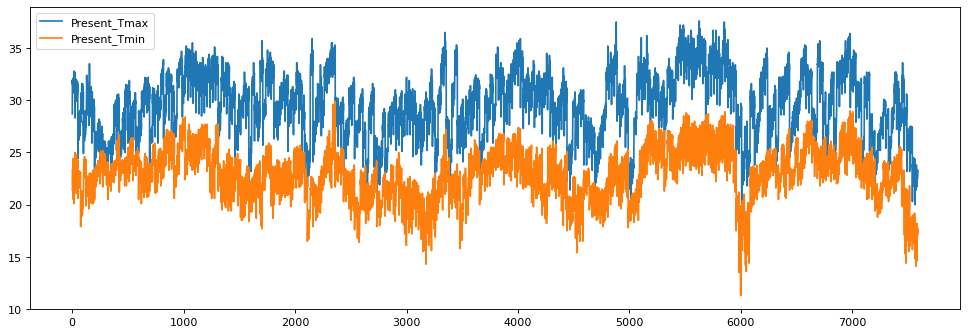

In [20]:
plt.figure(figsize=(15, 5), dpi=80)
plt.plot(temp_proj["Present_Tmax"],label="Present_Tmax")
plt.plot(temp_proj["Present_Tmin"],label="Present_Tmin")
plt.legend()
plt.show()

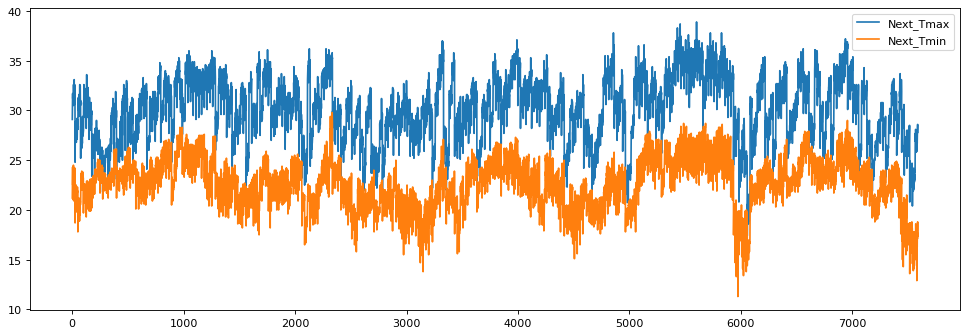

In [21]:
plt.figure(figsize=(15, 5), dpi=80)
plt.plot(temp_proj["Next_Tmax"],label="Next_Tmax")
plt.plot(temp_proj["Next_Tmin"],label="Next_Tmin")
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

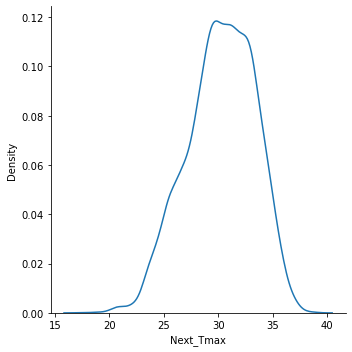

<Figure size 432x288 with 0 Axes>

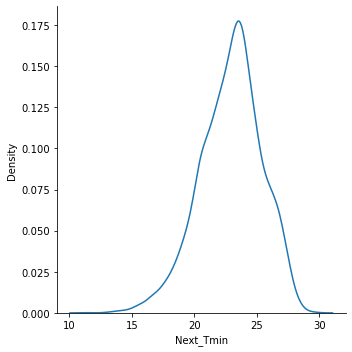

In [24]:
for col in ["Next_Tmax","Next_Tmin"]:
    plt.figure()
    sns.displot(temp_proj[col],kind='kde')
    plt.show()

In [25]:
print(temp_proj["Next_Tmax"].mean())
print(temp_proj["Next_Tmax"].std())

30.241526093832377
3.111807069134012


In [26]:
print(temp_proj["Next_Tmin"].mean())
print(temp_proj["Next_Tmin"].std())

22.910819715340047
2.4822555109068802


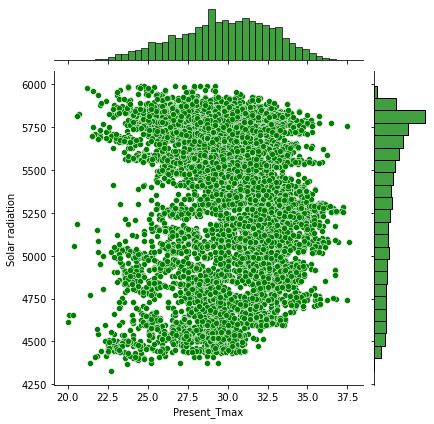

In [27]:
sns.jointplot('Present_Tmax', 'Solar radiation', temp_proj, kind='scatter', color='green')

From the above case, the higher values of Solar Radiation is Associated with Lower Values of Maximum Temperature

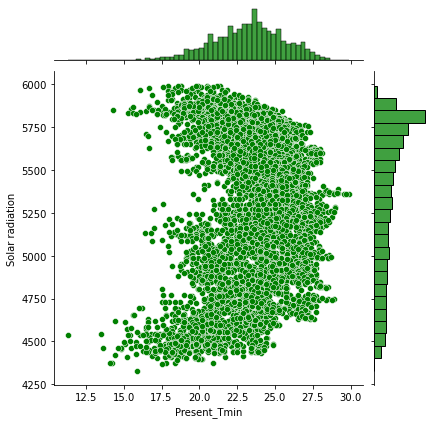

In [29]:
sns.jointplot('Present_Tmin', 'Solar radiation', temp_proj, kind='scatter', color='green')

From the above case, the higher values of Solar Radiation are associated with lower values of minimum temperature

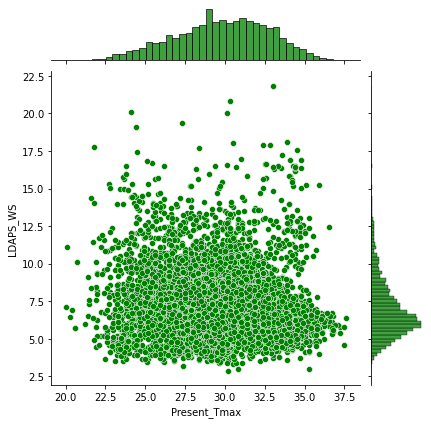

In [30]:
sns.jointplot('Present_Tmax', 'LDAPS_WS', temp_proj, kind='scatter', color='green')

From the above case, the lower values of wind speeds are associated with high temperatures

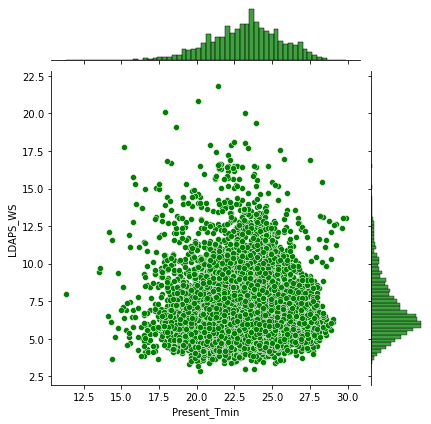

In [31]:
sns.jointplot('Present_Tmin', 'LDAPS_WS', temp_proj, kind='scatter', color='green')

From the above case, the lower values of wind speeds are associated with high temperatures

# Correlation ---

In [33]:
temp_proj.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.113301,0.133282,-0.067846,-0.169351,0.069856,0.105277,0.005822,-0.132129,0.006539,...,-0.007635,-0.013865,-0.011085,-0.239118,-0.118845,-0.256706,-0.091721,-0.021194,0.107747,0.128184
Present_Tmax,0.113301,1.000000,0.615208,-0.209059,-0.306943,0.573777,0.628705,-0.125952,0.134246,-0.316333,...,-0.104779,-0.127248,-0.107295,-0.054134,0.007695,-0.189439,-0.107079,-0.022114,0.610357,0.621048
Present_Tmin,0.133282,0.615208,1.000000,0.122200,-0.018576,0.467904,0.772061,-0.038779,-0.012817,0.084348,...,0.066207,-0.052428,-0.070391,-0.081417,-0.045174,-0.254084,-0.148423,0.059765,0.463523,0.796975
LDAPS_RHmin,-0.067846,-0.209059,0.122200,1.000000,0.578358,-0.569580,0.085237,0.289422,-0.072195,0.612831,...,0.389572,0.237512,0.167311,0.085027,-0.077590,0.100684,0.122454,0.242168,-0.446824,0.093249
LDAPS_RHmax,-0.169351,-0.306943,-0.018576,0.578358,1.000000,-0.377293,-0.118965,0.131269,0.238986,0.435937,...,0.227581,0.132436,0.118101,0.194820,0.025563,0.176557,0.219436,0.146622,-0.289788,-0.076415
LDAPS_Tmax_lapse,0.069856,0.573777,0.467904,-0.569580,-0.377293,1.000000,0.653425,-0.316011,0.043663,-0.440878,...,-0.248369,-0.193749,-0.170415,-0.044052,0.091568,-0.181433,-0.163891,0.047414,0.835729,0.589963
LDAPS_Tmin_lapse,0.105277,0.628705,0.772061,0.085237,-0.118965,0.653425,1.000000,-0.134652,-0.139675,0.008714,...,-0.002743,-0.093116,-0.103541,-0.099452,-0.024703,-0.198396,-0.187864,0.157763,0.592119,0.886513
LDAPS_WS,0.005822,-0.125952,-0.038779,0.289422,0.131269,-0.316011,-0.134652,1.000000,0.004427,0.285349,...,0.181634,0.147199,0.134428,0.033025,-0.063009,0.188540,0.169223,0.120630,-0.351107,-0.102021
LDAPS_LH,-0.132129,0.134246,-0.012817,-0.072195,0.238986,0.043663,-0.139675,0.004427,1.000000,-0.148314,...,-0.084375,0.009495,0.012372,0.133309,0.024476,0.056362,0.087517,-0.044956,0.156779,-0.060392
LDAPS_CC1,0.006539,-0.316333,0.084348,0.612831,0.435937,-0.440878,0.008714,0.285349,-0.148314,1.000000,...,0.389368,0.166763,0.088897,-0.010268,-0.007962,-0.017378,-0.023893,0.218285,-0.459705,-0.012877


Correlation using Heatmap ---

<AxesSubplot:>

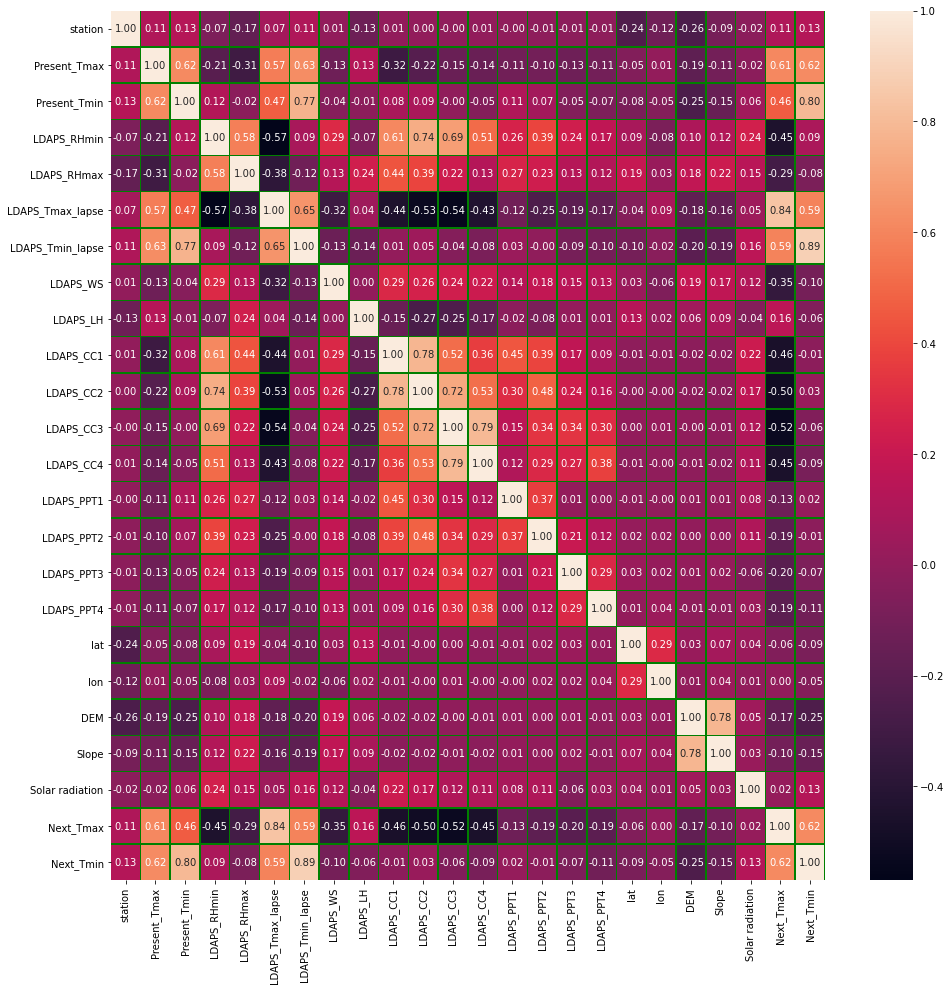

In [34]:
plt.figure(figsize=(16,16))
sns.heatmap(temp_proj.corr(), annot=True, linewidth=0.5, linecolor='green', fmt='.2f')

From the above case, it tells us that there are some very high correlation between certain features

# Scatterplot ---

In [35]:
temp_proj.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

<AxesSubplot:xlabel='DEM', ylabel='Present_Tmax'>

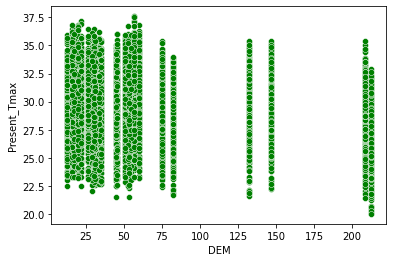

In [36]:
sns.scatterplot(x = temp_proj['DEM'], y = temp_proj['Present_Tmax'], color = 'green')

<AxesSubplot:xlabel='DEM', ylabel='Present_Tmin'>

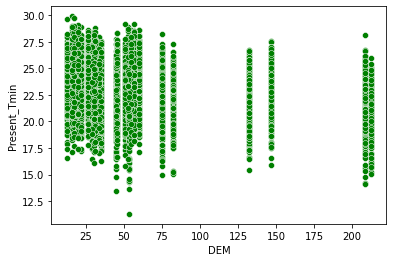

In [37]:
sns.scatterplot(x = temp_proj['DEM'], y = temp_proj['Present_Tmin'], color ='green')

In [38]:
temp_proj.skew()

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
dtype: float64

From the above case, there are a lot of skewness in continuous columns

<AxesSubplot:xlabel='Slope', ylabel='count'>

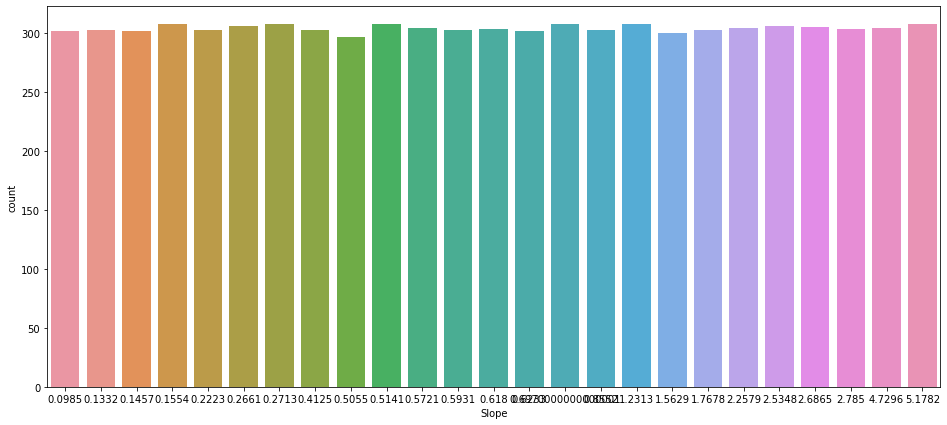

In [41]:
plt.figure(figsize=(16,7))
sns.countplot(temp_proj['Slope'])

From the above case, the slope values do not have equal no. of counts

<AxesSubplot:xlabel='DEM', ylabel='count'>

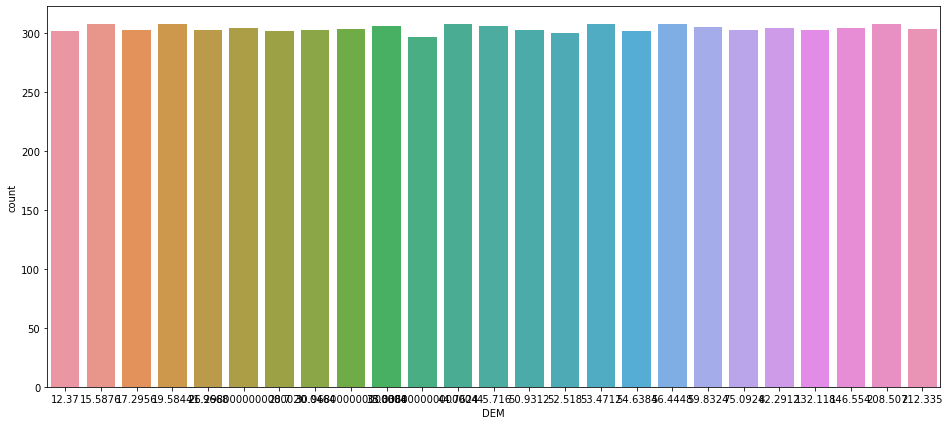

In [42]:
plt.figure(figsize=(16,7))
sns.countplot(x ='DEM', data = temp_proj)

# Checking Outliers ---

In [43]:
temp_proj.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

<AxesSubplot:xlabel='station'>

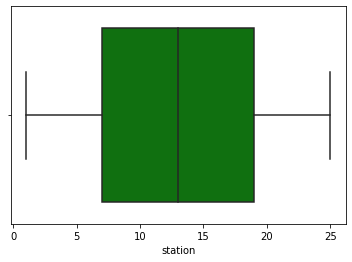

In [44]:
sns.boxplot(temp_proj['station'], color='green')

<AxesSubplot:xlabel='Present_Tmax'>

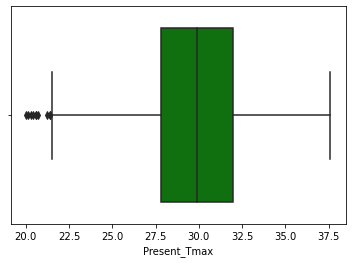

In [45]:
sns.boxplot(temp_proj['Present_Tmax'], color='green')

<AxesSubplot:xlabel='Present_Tmin'>

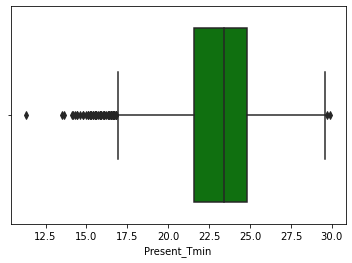

In [46]:
sns.boxplot(temp_proj['Present_Tmin'], color='green')

<AxesSubplot:xlabel='LDAPS_RHmin'>

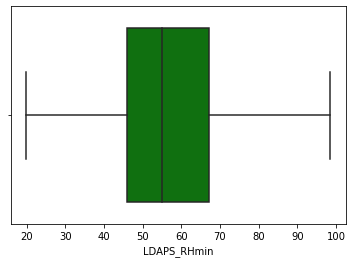

In [47]:
sns.boxplot(temp_proj['LDAPS_RHmin'], color='green')

<AxesSubplot:xlabel='LDAPS_RHmax'>

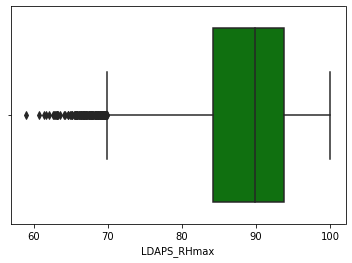

In [48]:
sns.boxplot(temp_proj['LDAPS_RHmax'], color='green')

<AxesSubplot:xlabel='LDAPS_Tmax_lapse'>

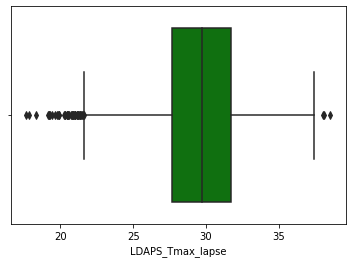

In [49]:
sns.boxplot(temp_proj['LDAPS_Tmax_lapse'], color='green')

<AxesSubplot:xlabel='LDAPS_Tmin_lapse'>

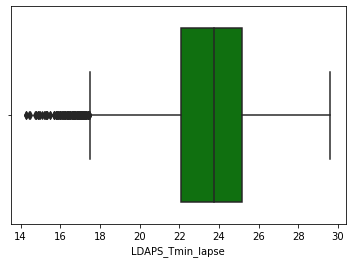

In [50]:
sns.boxplot(temp_proj['LDAPS_Tmin_lapse'], color='green')

<AxesSubplot:xlabel='LDAPS_WS'>

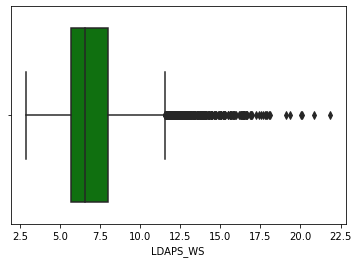

In [51]:
sns.boxplot(temp_proj['LDAPS_WS'], color='green')

<AxesSubplot:xlabel='LDAPS_LH'>

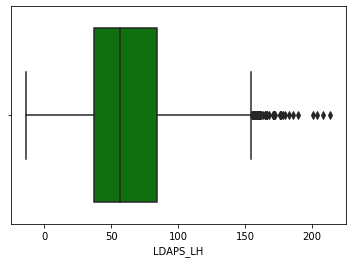

In [52]:
sns.boxplot(temp_proj['LDAPS_LH'], color='green')

<AxesSubplot:xlabel='LDAPS_CC1'>

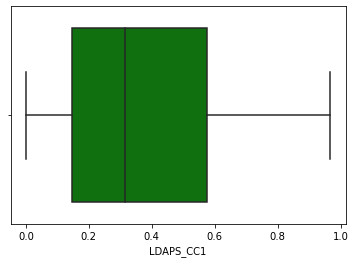

In [54]:
sns.boxplot(temp_proj['LDAPS_CC1'], color='green')

<AxesSubplot:xlabel='LDAPS_CC2'>

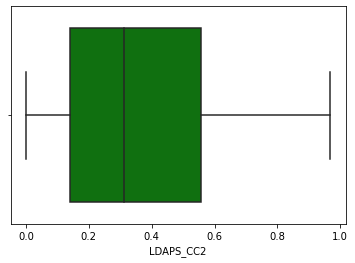

In [55]:
sns.boxplot(temp_proj['LDAPS_CC2'], color='green')

<AxesSubplot:xlabel='LDAPS_CC3'>

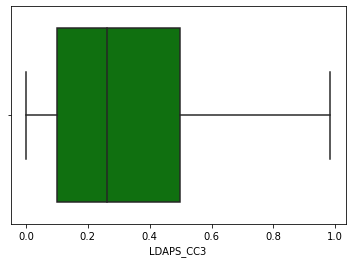

In [56]:
sns.boxplot(temp_proj['LDAPS_CC3'], color='green')

<AxesSubplot:xlabel='LDAPS_CC4'>

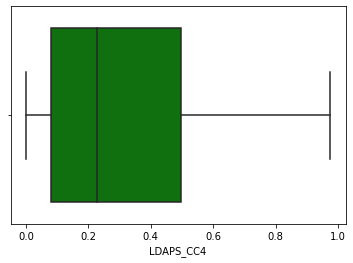

In [57]:
sns.boxplot(temp_proj['LDAPS_CC4'], color='green')

<AxesSubplot:xlabel='LDAPS_PPT1'>

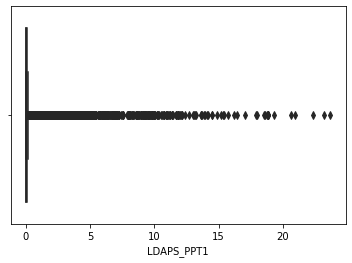

In [58]:
sns.boxplot(temp_proj['LDAPS_PPT1'], color='green')

<AxesSubplot:xlabel='LDAPS_PPT2'>

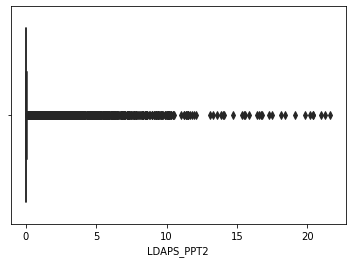

In [59]:
sns.boxplot(temp_proj['LDAPS_PPT2'], color='green')

<AxesSubplot:xlabel='LDAPS_PPT3'>

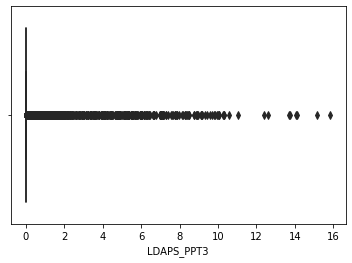

In [60]:
sns.boxplot(temp_proj['LDAPS_PPT3'], color='green')

<AxesSubplot:xlabel='LDAPS_PPT4'>

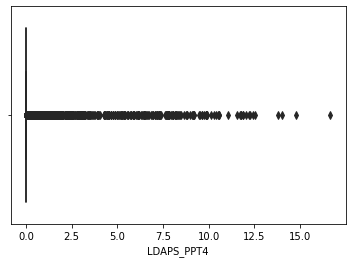

In [61]:
sns.boxplot(temp_proj['LDAPS_PPT4'], color='green')

<AxesSubplot:xlabel='lat'>

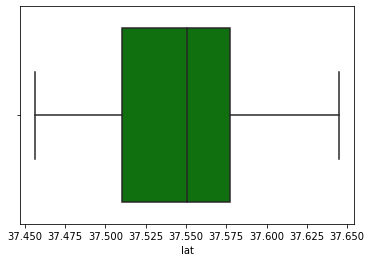

In [62]:
sns.boxplot(temp_proj['lat'], color='green')

<AxesSubplot:xlabel='lon'>

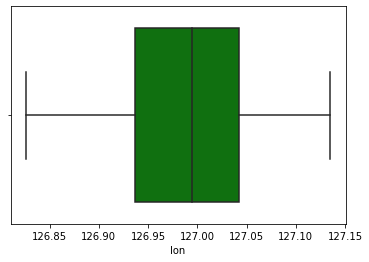

In [63]:
sns.boxplot(temp_proj['lon'], color='green')

<AxesSubplot:xlabel='DEM'>

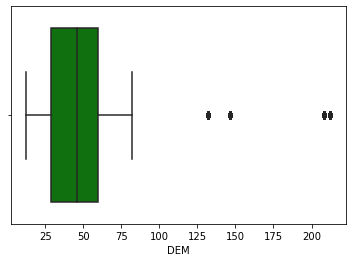

In [64]:
sns.boxplot(temp_proj['DEM'], color='green')

<AxesSubplot:xlabel='Slope'>

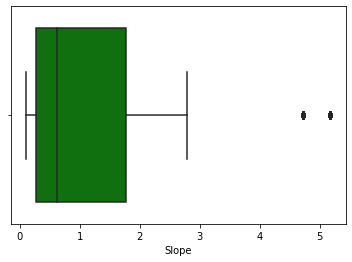

In [65]:
sns.boxplot(temp_proj['Slope'], color='green')

<AxesSubplot:xlabel='Solar radiation'>

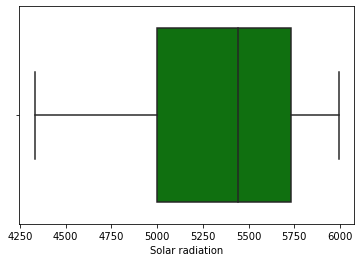

In [66]:
sns.boxplot(temp_proj['Solar radiation'], color='green')

<AxesSubplot:xlabel='Next_Tmax'>

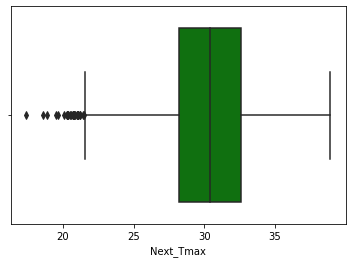

In [67]:
sns.boxplot(temp_proj['Next_Tmax'], color='green')

<AxesSubplot:xlabel='Next_Tmin'>

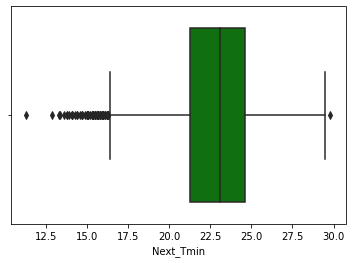

In [68]:
sns.boxplot(temp_proj['Next_Tmin'], color='green')

From the above case, there are a lot of outliers in the dataset

In [69]:
temp_proj.drop(['station'],axis=1,inplace=True)

# Normal Distribution Curve ---

In [70]:
temp_proj.columns

Index(['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

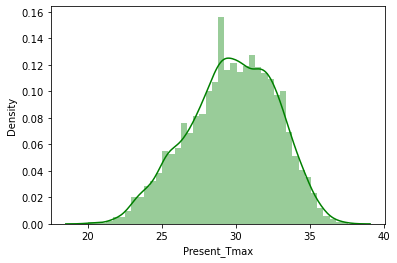

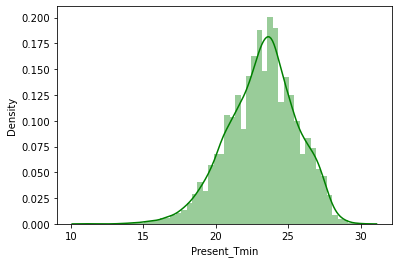

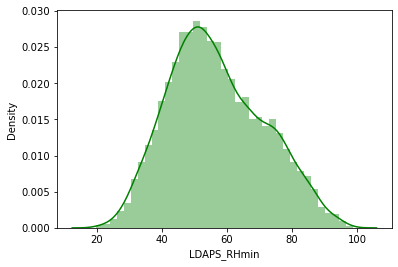

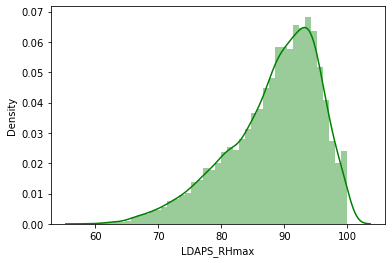

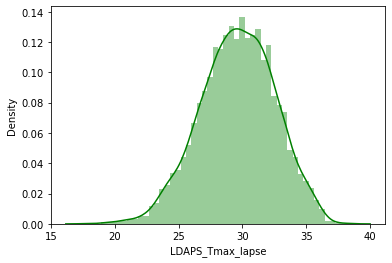

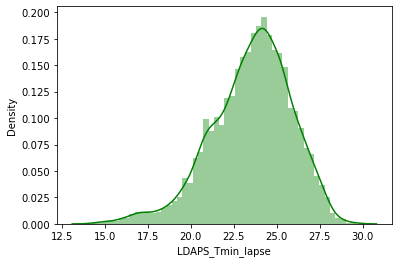

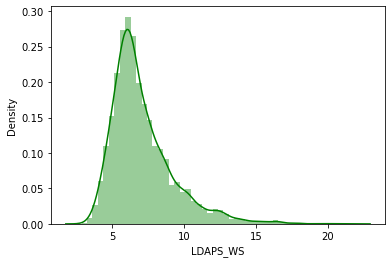

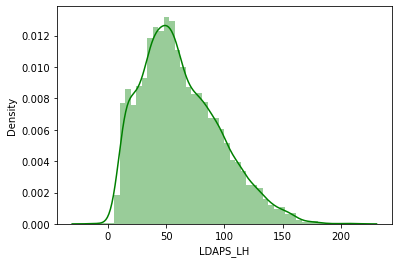

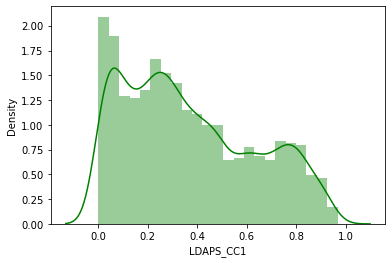

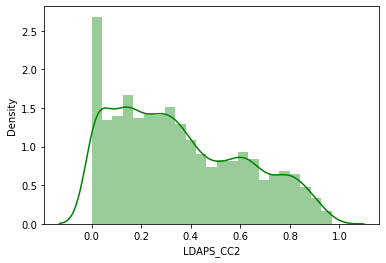

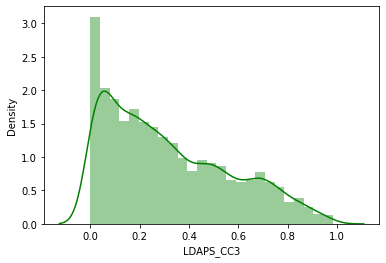

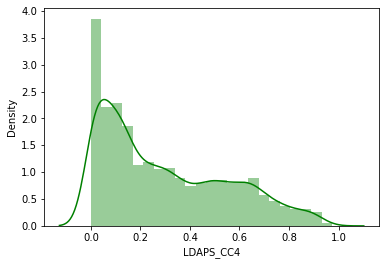

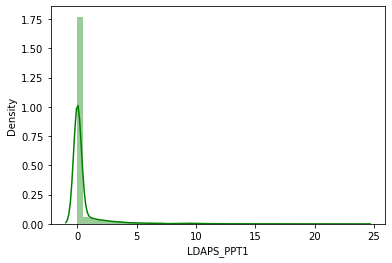

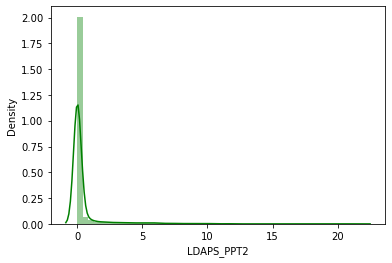

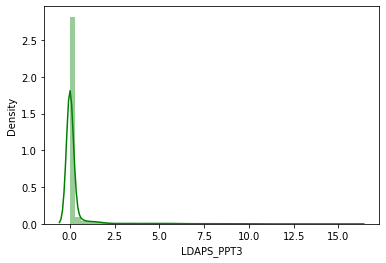

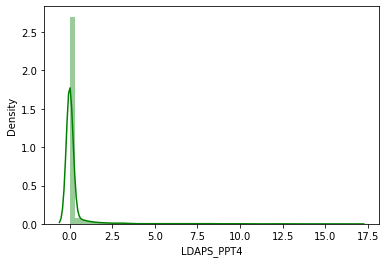

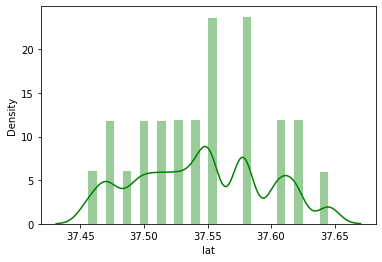

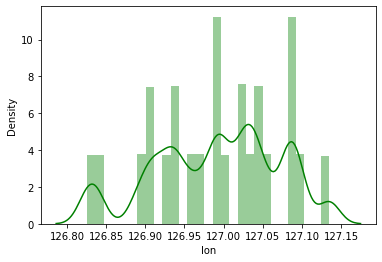

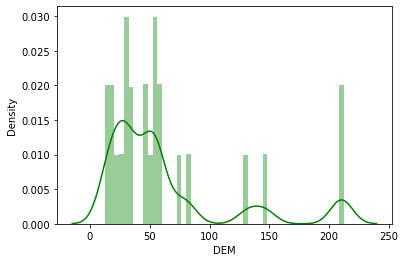

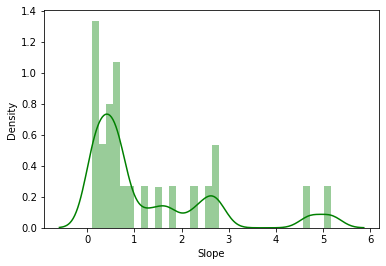

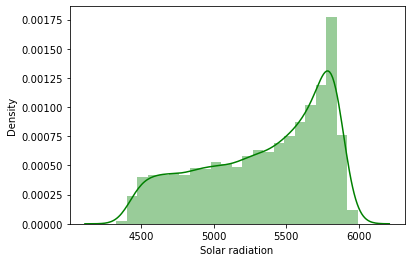

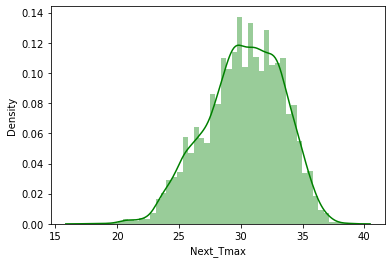

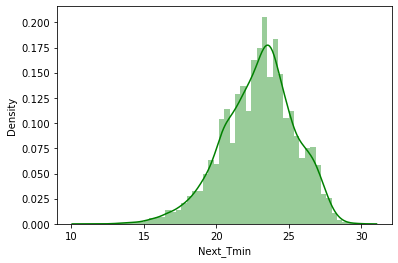

In [71]:
# Using a loop to iterate/plot all the data in the given columns
for i in temp_proj.columns:
    sns.distplot(temp_proj[i], color='green')
    plt.show()

From the above case, the data is not normally distributed and there are a lot of skewness

# Checking Multicolinearity ---

In [72]:
from scipy.stats import zscore

z = np.abs(zscore(temp_proj))

In [73]:
for i in [3,3.2,3.4,3.6,3.8,4,4.2,4.4,4.6,4.8,5]:
    TP_new = temp_proj[(z<i).all(axis=1)]
    loss_percentage = (len(temp_proj)-len(TP_new))/len(temp_proj)
    print('LOSS%',loss_percentage)

LOSS% 0.11188719030047443
LOSS% 0.09659989457037428
LOSS% 0.08447548761201898
LOSS% 0.07696362677912494
LOSS% 0.06958355297838692
LOSS% 0.06312598840274117
LOSS% 0.058777016341591985
LOSS% 0.05271481286241434
LOSS% 0.04823405376910912
LOSS% 0.04388508170795994
LOSS% 0.04085397996837111


In [78]:
# Taking threshold value as 3.4
temp_proj = temp_proj[(z<3.6).all(axis=1)]

In [79]:
temp_proj.shape

(7004, 23)

Total number of Rows = 7004 an Columns = 23

In [80]:
#Since the latitude is highly colinear and hence we will remove it
temp_proj.drop(['lat','lon'], axis=1, inplace=True)

In [82]:
x = temp_proj.iloc[:,:-2]
y = temp_proj.iloc[:,-2:]

In [83]:
from sklearn.preprocessing import power_transform

x = power_transform(x, method='yeo-johnson')

In [84]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x = ss.fit_transform(x)

# Linear Regression ---

In [85]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

x_train = x
y_train = y
x_test = x
y_test = y
r_state = 0
max_r2 = 0
lr = LinearRegression()
for i in range(0,2000):
    tr_x,t_x,tr_y,t_y=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(tr_x,tr_y)
    pred=lr.predict(t_x)
    if r2_score(t_y,pred)>max_r2:
        x_train = tr_x
        x_test = t_x
        y_train = tr_y
        y_test = t_y
        r_state = i
        max_r2 = r2_score(t_y,pred)
print("At Random State",i,"max_r2 is",max_r2)

At Random State 1999 max_r2 is 0.8202647126659763


In [86]:
def fun(f):
    f.fit(x_train,y_train)
    pred = f.predict(x_test)
    print("MSE =",mean_squared_error(y_test,pred))
    print("r2 score =",r2_score(y_test,pred))

# Cross Validation Score ---

In [87]:
from sklearn.model_selection import cross_val_score,KFold
def cvs(m):
    cv1 = KFold(n_splits=5,shuffle=True)
    score = cross_val_score(m,x,y,cv=cv1,scoring='r2')
    print("Cross Val Score =",score)
    print(score.mean())

In [88]:
from sklearn.model_selection import GridSearchCV
def hypertuning(params,model):
    gd = GridSearchCV(model,params,cv=5)
    gd.fit(x,y)
    print(gd.best_params_)

In [89]:
lr_params = {'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'n_jobs':[None,1,2,3]}
hypertuning(lr_params,lr)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True}


In [90]:
lr = LinearRegression(copy_X=True,fit_intercept=True,n_jobs=None,normalize=True)

In [91]:
fun(lr)
cvs(lr)

MSE = 1.4821971340679505
r2 score = 0.8202647126659763
Cross Val Score = [0.79129178 0.79892945 0.78065068 0.79603477 0.79936729]
0.793254792846245


In [92]:
CVS = [79.32]
r2 = [82.02]
Model = ['Linear Regression']

In [93]:
l = Lasso()
params_lasso = {
    'alpha':[0.001,0.01,0.1,1],
    'fit_intercept':[True,False],
    'normalize':[True,False],
    'copy_X':[True,False]
}
hypertuning(params_lasso,l)

{'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'normalize': False}


In [94]:
l = Lasso(alpha=0.01,copy_X=True,fit_intercept=True,normalize=False)

In [95]:
fun(l)
cvs(l)

MSE = 1.4935060659039419
r2 score = 0.8188854713192193
Cross Val Score = [0.80347222 0.79038183 0.78818877 0.7971258  0.78164243]
0.7921622113937788


In [96]:
CVS.append(79.21)
r2.append(81.88)
Model.append('Lasso')

In [97]:
R = Ridge()
params_ridge = {
    'alpha':[0.001,0.01,0.1,1],
    'fit_intercept':[True,False],
    'normalize':[True,False],
    'copy_X':[True,False]
}
hypertuning(params_ridge,R)

{'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'normalize': True}


In [98]:
R = Ridge(alpha=0.01,copy_X=True,fit_intercept=True,normalize=True)

In [99]:
fun(R)
cvs(R)

MSE = 1.4871301877685363
r2 score = 0.8197403703291063
Cross Val Score = [0.7920069  0.80728284 0.7824639  0.787043   0.79467638]
0.7926946055255055


In [100]:
CVS.append(79.26)
r2.append(81.97)
Model.append('Ridge')

In [101]:
en = ElasticNet()
params_en = {
    'alpha':[0.001,0.01,0.1,1],
    'fit_intercept':[True,False],
    'normalize':[True,False],
    'copy_X':[True,False]
}
hypertuning(params_en,en)

{'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'normalize': False}


In [102]:
en = ElasticNet(alpha=0.01,copy_X=True,fit_intercept=True,normalize=False)

In [103]:
fun(en)
cvs(en)

MSE = 1.4895828893628955
r2 score = 0.8194106815381808
Cross Val Score = [0.79500694 0.80048614 0.78397903 0.78785262 0.79573566]
0.7926120779403599


In [104]:
CVS.append(79.26)
r2.append(81.94)
Model.append('Elastic Net')

In [105]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
params_dtr = {'criterion':['mse','friedman_mse','mae'],'splitter':['random','best'],'max_depth':[10,12,15],'min_samples_split':[5,10,15]}
hypertuning(params_dtr,dtr)

{'criterion': 'friedman_mse', 'max_depth': 10, 'min_samples_split': 10, 'splitter': 'best'}


In [106]:
dtr = DecisionTreeRegressor(criterion='friedman_mse',max_depth=10,min_samples_split=10,splitter='best')

In [107]:
fun(dtr)
cvs(dtr)

MSE = 1.6517428344793168
r2 score = 0.7974126905688698
Cross Val Score = [0.78836211 0.76729531 0.75864489 0.7888557  0.77894738]
0.776421076809256


In [108]:
CVS.append(77.64)
r2.append(79.74)
Model.append('Decision Tree Regressor')

In [109]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
params_knr = {'n_neighbors':[5,7,9,11],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute'],'leaf_size':[30,40,50]}
hypertuning(params_knr,knr)

{'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 11, 'weights': 'distance'}


In [110]:
knr = KNeighborsRegressor(algorithm='auto',leaf_size=30,n_neighbors=11,weights='distance')

In [111]:
fun(knr)
cvs(knr)

MSE = 0.8842613177626034
r2 score = 0.889141021576836
Cross Val Score = [0.88823684 0.88308556 0.87925029 0.87416903 0.88102717]
0.8811537771938738


In [112]:
CVS.append(88.11)
r2.append(88.91)
Model.append('K Neighbors Regressor')

# Ensemble Method ---

In [113]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,HistGradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor

rf = RandomForestRegressor()
etr = ExtraTreeRegressor()
ada = AdaBoostRegressor()
Gd = GradientBoostingRegressor()
HGd = HistGradientBoostingRegressor()

In [114]:
fun(rf)
cvs(rf)

MSE = 0.7831494932191295
r2 score = 0.9020639049078727
Cross Val Score = [0.89117368 0.88658117 0.8929072  0.89322077 0.89318923]
0.891414408374175


In [116]:
r2.append(90.20)
CVS.append(89.14)
Model.append('Random Forest Regressor')

In [117]:
params_etr = {'criterion':['mse','friedman_mse','mae'],
            'splitter':['random','best'],
            'max_depth':[None,1,2,3],
            'min_samples_split':[2,3,4]}
hypertuning(params_etr,etr)

{'criterion': 'mse', 'max_depth': 3, 'min_samples_split': 3, 'splitter': 'best'}


In [118]:
etr = ExtraTreeRegressor(criterion='mse',max_depth=3,min_samples_split=3,splitter='best')

In [119]:
fun(etr)
cvs(etr)

MSE = 2.730776063139481
r2 score = 0.6625095178592014
Cross Val Score = [0.62786753 0.62973841 0.64992221 0.6069192  0.63117254]
0.6291239755376934


In [128]:
CVS.append(62.91)
r2.append(66.25)
Model.append('Extra Tree Regressor')

In [129]:
output = pd.DataFrame()
output['Models'] = Model[:8]
output['CVS'] = CVS[:8]
output['r2'] = r2[:8]
diff = []

for i in range(0,len(r2)):
    diff.append(r2[i]-CVS[i])
    
output['diff'] = diff[:8]
output.index+=1

In [130]:
output

,Models,CVS,r2,diff
1,Linear Regression,79.32,82.02,2.70
2,Lasso,79.21,81.88,2.67
3,Ridge,79.26,81.97,2.71
4,Elastic Net,79.26,81.94,2.68
5,Decision Tree Regressor,77.64,79.74,2.10
6,K Neighbors Regressor,88.11,88.91,0.80
7,Random Forest Regressor,89.14,90.20,1.06
8,Extra Tree Regressor,89.14,90.20,1.06


Best model should be K Neighbors Regressor as it has highest r2 value with minimum differenece between cross val score

# Model Saving ---

In [131]:
import pickle

filename = 'Temperature_Project.pkl'
pickle.dump(knr,open(filename,'wb'))

In [132]:
predict = knr.predict(x_test)

In [133]:
y_test

,Next_Tmax,Next_Tmin
4172,32.2,23.3
1421,31.3,21.4
5798,33.0,27.6
16,31.5,21.1
5356,33.1,25.4
...,...,...
6401,33.7,25.8
93,27.4,22.5
7046,31.6,24.0
1694,29.4,21.6


In [134]:
predict

array([[31.67196327, 22.77436916],
       [30.61445116, 21.8985833 ],
       [33.01102586, 27.04419476],
       ...,
       [32.31853576, 24.25188428],
       [29.56769858, 22.00496101],
       [31.20462551, 19.50907822]])

In [135]:
output = pd.DataFrame(predict)

In [136]:
output

,0,1
0,31.671963,22.774369
1,30.614451,21.898583
2,33.011026,27.044195
3,31.331850,22.108765
4,31.626604,25.667297
...,...,...
1396,33.346942,25.436571
1397,28.331982,22.859914
1398,32.318536,24.251884
1399,29.567699,22.004961


In [138]:
# Let's save the Dataframe in csv file

In [137]:
output.to_csv('Tempreture_Forecast_Project.csv')

The r2 score in case of K Neighbors Regressor is the highest i.e. 88.91  